## Robot setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

import sys
sys.path.append("..")
sys.path.append("../../")

from armControl import *
from forwardKinematics import robot_config
from utils.motor_setup import maxonGearSmall
import armControl

import signal

socket_ip = '192.168.0.115'
socket_port = 1122

#trajPlanner = trajectoryGenerator()

motors = maxonGearSmall()
motors.tcp_init(socket_ip, socket_port)

#axis_motor_indexes = np.array([-1, -1, -1, 0, 3, 2, 1]) #indexed from 0 for motors and axis
#velocity = np.ones(8)*3.14/20


Opening socket at ip: 192.168.0.115 using port: 1122


## Command motors w/ indexing for joints

def commandJoints(setpoint_arm, trajectory = True):
    myArm = armControl.remoteRobotArm()
    myArm.jointAngleSetpoint = setpoint_arm
    myArm.updateMotorArmMixing()
    setpoint_motor = np.zeros(8)
    setpoint_motor[axis_motor_indexes[3:7]] = myArm.motorAngleSetpoint[3:7]
    if trajectory:
        motors.run_trajectory(setpoint_motor, velocity)
    else:
        motors.command_motors_radians(setpoint_motor)


## Arm Motors

In [2]:
print("Arming motors now...")
motors.arm_motors()
for i in range(8):
    motors.zero_motors_radians(i, motors.get_motors_position_radians()[i])

Arming motors now...
initializing motors to [0 7 0 0 0 0 0 0]
*** C side has an error or needs to be armed ***

Arming motors


## Manual motor zeroing

In [7]:
from importlib import reload
reload(armControl)

myArm = armControl.remoteRobotArm()

#for i in range(5):
setpoint_arm = np.array([-0.000,0.000,0.6,-0.1,-0.2,0.,0.00])
myArm.commandJoints(motors, setpoint_arm)
#time.sleep(2)
    #setpoint_arm = np.array([0.0,0.00,-0.0,0.0,0.0,-0.0,0.00])
    #myArm.commandJoints(motors, setpoint_arm)
    #time.sleep(2)
    #myArm.commandJoints(motors, setpoint_arm)
time.sleep(0.5)


In [12]:
for i in range(8):
    motors.zero_motors_radians(i, motors.get_motors_position_radians()[i])

average time: 0.002063405059860321
std time: 0.00024425414241415155


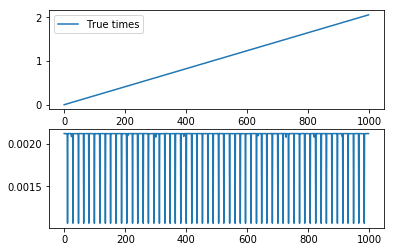

In [19]:
setpoint = np.zeros(8)
import time

#time_list = []
true_times = []
start = time.time()
for i in range(1000):
    #time_list.append(time.time()-start)
    motors.command_motors_radians(setpoint)
    true_times.append(motors.command_time)

true_times = np.array(true_times)[1:]/10**9
true_times = true_times - true_times[0]

diffs = true_times[1:] - true_times[:-1]
print('average time: {}'.format(diffs.mean()))
print('std time: {}'.format(diffs.std()))

plt.figure()
#plt.plot(time_list)
plt.subplot(2,1,1)
plt.plot(true_times)
plt.legend(['True times'])
plt.subplot(2,1,2)
plt.plot(diffs)
plt.show()



## Test arm joint mixing

### this is old, now in "commandJoints" above

import armControl
from importlib import reload
reload(armControl)

setpoint_arm = np.array([0,0,0,0,0,0,-0])
myArm = armControl.remoteRobotArm()
myArm.jointAngleSetpoint = setpoint_arm
myArm.updateMotorArmMixing()
print(myArm.motorAngleSetpoint)

setpoint_motor = np.zeros(8)
setpoint_motor[axis_motor_indexes[3:7]] = myArm.motorAngleSetpoint[3:7]
print(setpoint_motor)
motors.run_trajectory(setpoint_motor, velocity)


In [87]:
print(myArm.jointUpperLimits)
print(myArm.jointLowerLimits)
a = np.linspace(myArm.jointLowerLimits[-1],myArm.jointUpperLimits[-1], num=50)
b = np.linspace(myArm.jointLowerLimits[-2],myArm.jointUpperLimits[-2], num=500)
c = np.linspace(myArm.jointLowerLimits[-3],myArm.jointUpperLimits[-3], num=50)
d = np.linspace(myArm.jointLowerLimits[-4],myArm.jointUpperLimits[-4], num=50)

print(a)
print(b)
#c = np.meshgrid(a,b)
#print(c)

setpoint_arm = np.array([0,0,0,0.,0,0.,0.0])
myArm.commandJoints(motors, setpoint_arm)

time.sleep(5)

for k in range(len(d)):
    #time.sleep(5)
    for j in range(len(c)):
        #time.sleep(5)
        setpoint_arm = np.array([0,0,0,d[k],c[j],b[i],0])
        myArm.commandJoints(motors, setpoint_arm, trajectory = True)
        time.sleep(5)
        for i in range(len(b)):
            setpoint_arm = np.array([0,0,0,d[k],c[j],b[i],0])
            myArm.commandJoints(motors, setpoint_arm, trajectory = False)
            time.sleep(0.02)
            #add in optitrack position measurements
        time.sleep(5)


setpoint_arm = np.array([0,0,0,0.,0,0.,0.0])
myArm.commandJoints(motors, setpoint_arm)

[82.    42.     1.75   0.872  0.872  0.872 47.5  ]
[-82.    -42.     -1.75   -0.872  -0.872  -0.872   0.   ]
[ 0.          0.96938776  1.93877551  2.90816327  3.87755102  4.84693878
  5.81632653  6.78571429  7.75510204  8.7244898   9.69387755 10.66326531
 11.63265306 12.60204082 13.57142857 14.54081633 15.51020408 16.47959184
 17.44897959 18.41836735 19.3877551  20.35714286 21.32653061 22.29591837
 23.26530612 24.23469388 25.20408163 26.17346939 27.14285714 28.1122449
 29.08163265 30.05102041 31.02040816 31.98979592 32.95918367 33.92857143
 34.89795918 35.86734694 36.83673469 37.80612245 38.7755102  39.74489796
 40.71428571 41.68367347 42.65306122 43.62244898 44.59183673 45.56122449
 46.53061224 47.5       ]
[-0.872      -0.86850501 -0.86501002 -0.86151503 -0.85802004 -0.85452505
 -0.85103006 -0.84753507 -0.84404008 -0.84054509 -0.8370501  -0.83355511
 -0.83006012 -0.82656513 -0.82307014 -0.81957515 -0.81608016 -0.81258517
 -0.80909018 -0.80559519 -0.8021002  -0.79860521 -0.79511022 -0

KeyboardInterrupt: 

## Sine wave / profile test

average time: 0.005441286890801777
std time: 0.00036752366055928216


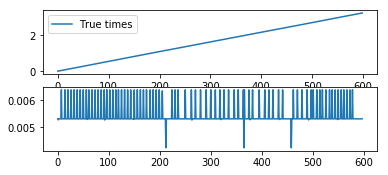

<function matplotlib.pyplot.show(*args, **kw)>

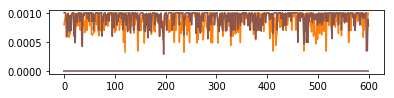

In [15]:
dt = 0.005
runtime = 3
num_elements = int(runtime/dt)
velocity = np.ones(8)*3.14/20
setpoints = np.zeros((num_elements, 7))
frequency = 0.3
amplitude = np.pi/10
for i in range(num_elements):
    setpoints[i,3:-1] = (np.ones(3) * np.sin(i*dt*2*pi*frequency)*amplitude)


start_time = time.time()
true_times = []
currents_mA = []

myArm.commandJoints(motors, setpoints[0,:], trajectory=True)

for i in range(num_elements):
    current_time = time.time()
    setpoint = setpoints[i]
    myArm.commandJoints(motors, setpoint, trajectory=False)
    true_times.append(motors.command_time)
    currents_mA.append(motors.avg_current)

    time.sleep(dt)

time.sleep(1.5)

motors.run_trajectory(np.zeros(8), velocity)


true_times = np.array(true_times)[1:]/10**9
true_times = true_times - true_times[0]

diffs = true_times[1:] - true_times[:-1]
print('average time: {}'.format(diffs.mean()))
print('std time: {}'.format(diffs.std()))

plt.figure()
#plt.plot(time_list)
plt.subplot(3,1,1)
plt.plot(true_times)
plt.legend(['True times'])
plt.subplot(3,1,2)
plt.plot(diffs)
plt.subplot(3,1,3)
plt.plot(currents_mA)
plt.show()


## Cleanup

In [35]:
psetpoints = np.zeros(8)
velocity = np.ones(8)*3.14/5
motors.run_trajectory(setpoints, velocity)
time.sleep(1)
motors.tcp_close()

In [89]:
motors.tcp_close()